---

------

# 🚧 📧 **PROJET CONVERSION RATE** ✅ ❌

##### **Doriane DOYON-DOUSSE** : *Certification bloc 3* ✅  (**ds_fs_od_03** 📖) 

------

### ➡️ **Importation librairies** 📚

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [1]:
# Basic imports
import pandas as pd
import numpy as np
from IPython.display import display

# Visualizations librairies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


# Importation of module for preprocessing steps
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Different model importations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Metrics importation for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Setting my own color palette as default
pio.templates["doriane"] = go.layout.Template(
    layout_colorway=['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
)
pio.templates.default = "doriane"
pio.renderers.default = "vscode" 



### ➡️ **Lecture of the dataset** 📀

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [2]:
conversion = pd.read_csv('/Volumes/T7/__Project 4 ML__/CONVERSION /conversion_data_train.csv')

-----

------

## 🔷 **PART 1️⃣ :** **EDA** 

------

### ➡️ **EDA (Exploratory Data Analysis)** of the Conversion Dataset 🔎

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

#### 🔸**Basic analysis** of the dataset 🐝

In [3]:
print('******************************************************************************************')
print('--------- B A S I C   A N A L Y S I S   O F   C O N V E R S I O N   D A T A S E T --------')
print('******************************************************************************************')
print()
print()

print('------------------------------------------------------------------------------------------')
print("           ++++++++++++++ Let's first visualise our dataset : ++++++++++++++")
print('------------------------------------------------------------------------------------------')
print()
display(conversion.head())
print()
print()

print('------------------------------------------------------------------------------------------')
print('                 ++++++++++++++ Shape of the dataset ++++++++++++++')
print('------------------------------------------------------------------------------------------')
print()
print(f'The dataset is composed of {conversion.shape[0]} rows')
print(f'The dataset is composed of {conversion.shape[1]} columns')
print()
print()
print()

print('------------------------------------------------------------------------------------------')
print('             ++++++++++++++ Here are the columns names : ++++++++++++++')
print('------------------------------------------------------------------------------------------')
print()
print(conversion.columns)
print()
print()

print('------------------------------------------------------------------------------------------')
print('.                ++++++++++++++ Basic statistics : ++++++++++++++')
print('------------------------------------------------------------------------------------------')
print()
display(conversion.describe(include="all"))
print()
print()

print('------------------------------------------------------------------------------------------')
print('   ++++++++++++++ Percentage of missing values in Conversion Dataset : ++++++++++++++')
print('------------------------------------------------------------------------------------------')
print()
print(round(conversion.isnull().sum()*100/len(conversion), 2))
print()
print()

print('------------------------------------------------------------------------------------------')
print('           +++++++++++++ Basic informations from the dataset : ++++++++++++++')
print('------------------------------------------------------------------------------------------')
print()
print(conversion.info())
print()
print()

print('------------------------------------------------------------------------------------------')
print('           +++++++++++++++++++ Checking for Duplicates : ++++++++++++++++++')
print('------------------------------------------------------------------------------------------')
print()
duplicates = conversion.duplicated().sum()
print(f'The Conversion dataset contains {duplicates} duplicates')

print()
print()
print('******************************************************************************************')
print('----------------------------------------- E N D  -----------------------------------------')
print('******************************************************************************************')

******************************************************************************************
--------- B A S I C   A N A L Y S I S   O F   C O N V E R S I O N   D A T A S E T --------
******************************************************************************************


------------------------------------------------------------------------------------------
           ++++++++++++++ Let's first visualise our dataset : ++++++++++++++
------------------------------------------------------------------------------------------



country  age  new_user  source  total_pages_visited  converted
0    China   22         1  Direct                    2          0
1       UK   21         1     Ads                    3          0
2  Germany   20         0     Seo                   14          1
3       US   23         1     Seo                    3          0
4       US   28         1  Direct                    3          0



------------------------------------------------------------------------------------------
                 ++++++++++++++ Shape of the dataset ++++++++++++++
------------------------------------------------------------------------------------------

The dataset is composed of 284580 rows
The dataset is composed of 6 columns



------------------------------------------------------------------------------------------
             ++++++++++++++ Here are the columns names : ++++++++++++++
------------------------------------------------------------------------------------------

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')


------------------------------------------------------------------------------------------
.                ++++++++++++++ Basic statistics : ++++++++++++++
------------------------------------------------------------------------------------------



country            age       new_user  source  total_pages_visited  \
count   284580  284580.000000  284580.000000  284580        284580.000000   
unique       4            NaN            NaN       3                  NaN   
top         US            NaN            NaN     Seo                  NaN   
freq    160124            NaN            NaN  139477                  NaN   
mean       NaN      30.564203       0.685452     NaN             4.873252   
std        NaN       8.266789       0.464336     NaN             3.341995   
min        NaN      17.000000       0.000000     NaN             1.000000   
25%        NaN      24.000000       0.000000     NaN             2.000000   
50%        NaN      30.000000       1.000000     NaN             4.000000   
75%        NaN      36.000000       1.000000     NaN             7.000000   
max        NaN     123.000000       1.000000     NaN            29.000000   

            converted  
count   284580.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean         0.032258  
std          0.176685  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000



------------------------------------------------------------------------------------------
   ++++++++++++++ Percentage of missing values in Conversion Dataset : ++++++++++++++
------------------------------------------------------------------------------------------

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64


------------------------------------------------------------------------------------------
           +++++++++++++ Basic informations from the dataset : ++++++++++++++
------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284

---

#### 	🔸 **What can we say about our dataset ?** 📍




- **Our model is composed of 6 columns** and a big amount of rows (nearly 300K):
   - **2 quantitatives** : 'age', 'total_pages_visited'
       
   - **4 categorical** : 'country', 'converted', 'source', 'new_user'('new user' and 'converted' are already Label Encoded)


-💥 **The target** 💥is 'converted' which is categorical so we are dealing with a **classification problem** // Yes or No (binary classification problem) --> converted or not converted to the DSW Newsletter

- 🔗**Explanatory variables :** 🔗 'country', 'source', 'new_user', 'age', 'total_pages_visited' (5 features)


- We have **no missing values** : no imputing and removal of NaN needed (Yay!) 

- **Duplicates** a lot of duplicates because of the context : won't be problematic for our model 


- **Column analysis**:
  - **US** is the most frequent 'country' (160K observation) and  **Seo** is the most frequent 'source' (139K observations)

  - *'Age' columns* : 17yo min and 123yo max with a mean of 30yo approx --> you might also notice that 123yo is a little too much, we will have to **remove outliers** here

  - **Max 'number of pages visited'** : 29 

  - **'Converted' and 'New_User'** : have 1 for maximum value --> perfect, no outlier there 

  - **In average** there is approximatively **5 pages visited**

  - **No modification of dtype needed**



---

### 🔹 **Removal of outliers** ❌


▶ Using masks **we are going to drop lines with outliers** (3 times standard deviation away positively from the mean --> no need to do it for negative values because Age is contained in a positive interval starting from 0)

In [4]:
# We take a sample in be able to do visualizations as the dataset is big 
conversion = conversion.sample(20000)

In [5]:
# Visualisation oof Age Column before outlier removal

fig = px.box(data_frame=conversion, x='age',
             title='BEFORE REMOVAL : Age distribution represented in a Box Plot')

fig.show('vscode')

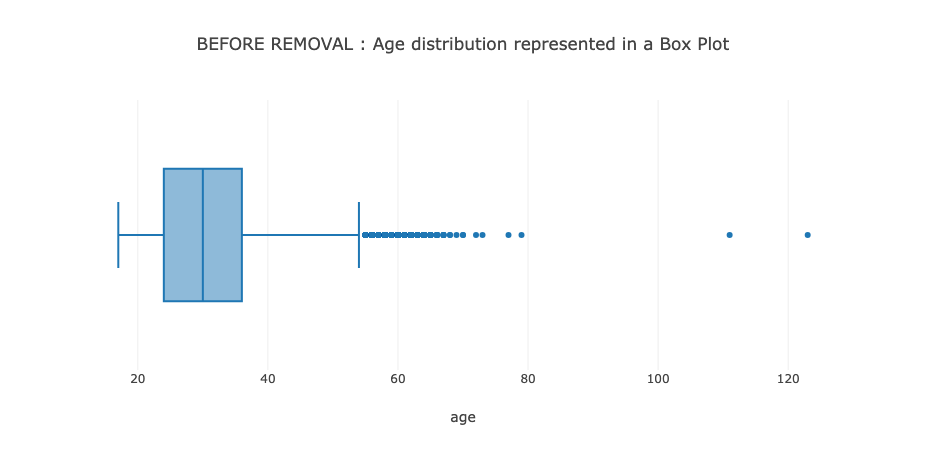

In [6]:
from IPython.display import Image
Image(filename="Graphs_EDA/graph_1.png")

In [7]:
# Drop lines containing outliers (using masks)



print('------------------------------------------------------------------------------------------')
print('             ++++++++++++++ Age outliers removal : ++++++++++++++')
print('------------------------------------------------------------------------------------------')
print()
print()

# We only keep positive values and apply it to the conversion dataset
keep = conversion['age'] > 0
conversion = conversion.loc[keep, :]
print(f'After keeping only positive values in age column, there is  {conversion.shape[0]} number of lines remaining.')
print()


# Now we eliminate outliers in this column
without_outliers = conversion['age'] < conversion['age'].mean() + 3*conversion['age'].std()
conversion = conversion.loc[without_outliers, :]

print(f'After removing outliers in age columns, there is  {conversion.shape[0]} number of lines remaining.')
print()


# Describe of the dataset
display(conversion.describe(include='all'))



print()
print()
print('------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------
             ++++++++++++++ Age outliers removal : ++++++++++++++
------------------------------------------------------------------------------------------


After keeping only positive values in age column, there is  20000 number of lines remaining.

After removing outliers in age columns, there is  19919 number of lines remaining.



country           age      new_user source  total_pages_visited  \
count    19919  19919.000000  19919.000000  19919         19919.000000   
unique       4           NaN           NaN      3                  NaN   
top         US           NaN           NaN    Seo                  NaN   
freq     11371           NaN           NaN   9788                  NaN   
mean       NaN     30.418796      0.689041    NaN             4.865405   
std        NaN      8.113942      0.462898    NaN             3.330252   
min        NaN     17.000000      0.000000    NaN             1.000000   
25%        NaN     24.000000      0.000000    NaN             2.000000   
50%        NaN     30.000000      1.000000    NaN             4.000000   
75%        NaN     36.000000      1.000000    NaN             7.000000   
max        NaN     55.000000      1.000000    NaN            26.000000   

           converted  
count   19919.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.031779  
std         0.175415  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------


In [8]:
fig = px.box(data_frame=conversion, x='age',
             title='AFTER REMOVAL : Age distribution represented in a Box Plot')

fig.show('vscode')

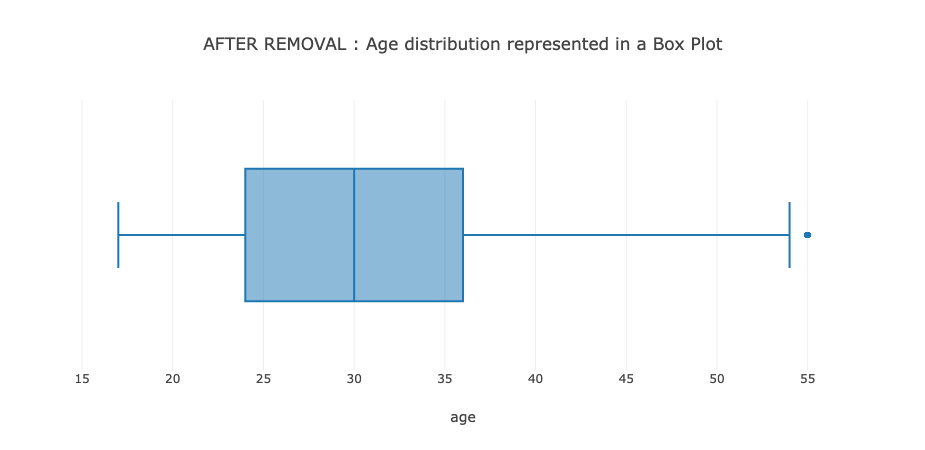

In [9]:
from IPython.display import Image
Image(filename="Graphs_EDA/graph_2.png")

### 🔸 **Analysis of the TARGET** 💥

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [10]:
# What is the percentage of converted ?

print('------------------------------------------------------------------------------------------------------')
print('                   +++++++++++++++++++ Converted Column Analysis  +++++++++++++++++++')
print('------------------------------------------------------------------------------------------------------')
print()
print()

no = conversion['converted'].value_counts()[0]
no_perc = round(no * 100 / len(conversion['converted']), 2)

yes = conversion['converted'].value_counts()[1]
yes_perc = round(yes * 100 / len(conversion['converted']), 2)


print(f' --> Number of observations Converted : {yes}')
print(f' --> Percentage of Converted : {yes_perc} %')
print()
print(f' --> Number of observations Non Converted : {no}')
print(f' --> Percentage of Non Converted : {no_perc} %')

fig3 = px.histogram(conversion, x='converted',
                    color = 'converted',
                    title = 'Histogram of Converted or not to the DSW Newsletter',
                    color_discrete_map = {0:'blue',1:'red'})
fig3.show('vscode')

print()
print()
print('------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------------------
                   +++++++++++++++++++ Converted Column Analysis  +++++++++++++++++++
------------------------------------------------------------------------------------------------------


 --> Number of observations Converted : 633
 --> Percentage of Converted : 3.18 %

 --> Number of observations Non Converted : 19286
 --> Percentage of Non Converted : 96.82 %




------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


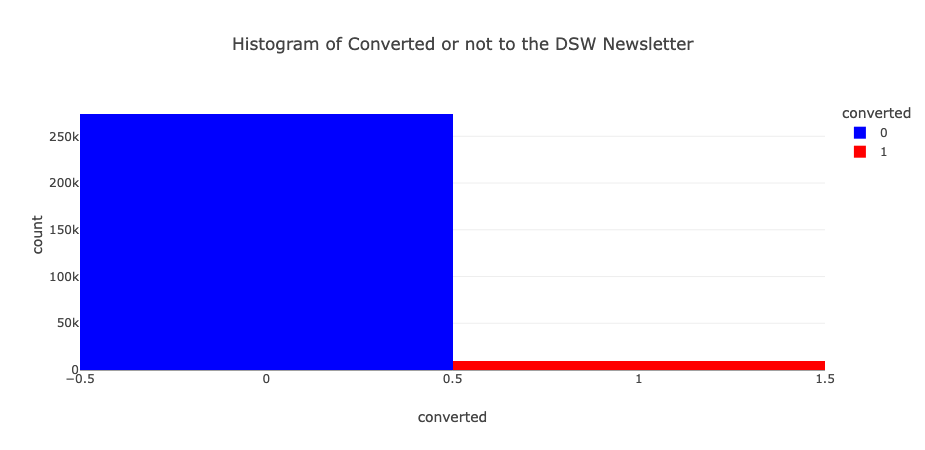

In [11]:
from IPython.display import Image
Image(filename="Graphs_EDA/graph_3.png")

##### 💡 **Interpretation :**
▶ Here we can see that nearly **97% non converted**, lefting only **3% converted people**

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +

#### 🔹 **What's the interval of age of Converted to the DSW Newletter?** 💥

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [12]:
num_features = ['age'] #'total_pages_visited', 

for graphs in num_features:
    
    fig = px.histogram(conversion, 
                       graphs, 
                       color = 'converted', 
                       facet_row = 'converted', 
                       histnorm = 'probability',
                       color_discrete_map = {0:'blue',1:'red'})
    
    fig.update_layout(height=600, width=800)
    fig.show()

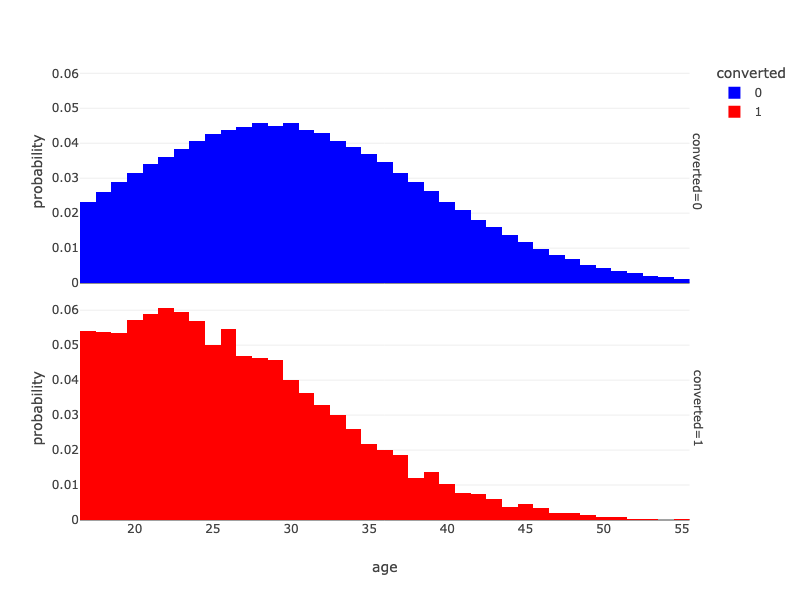

In [13]:
from IPython.display import Image
Image(filename="Graphs_EDA/graph_4.png")

##### 💡 **Interpretation :**
+ Up there, we have the distribution of Age from non converted people and down the converted ones 
+ We can see that **people converted seems to be younger** 
+ Let's have a closer look at this population 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



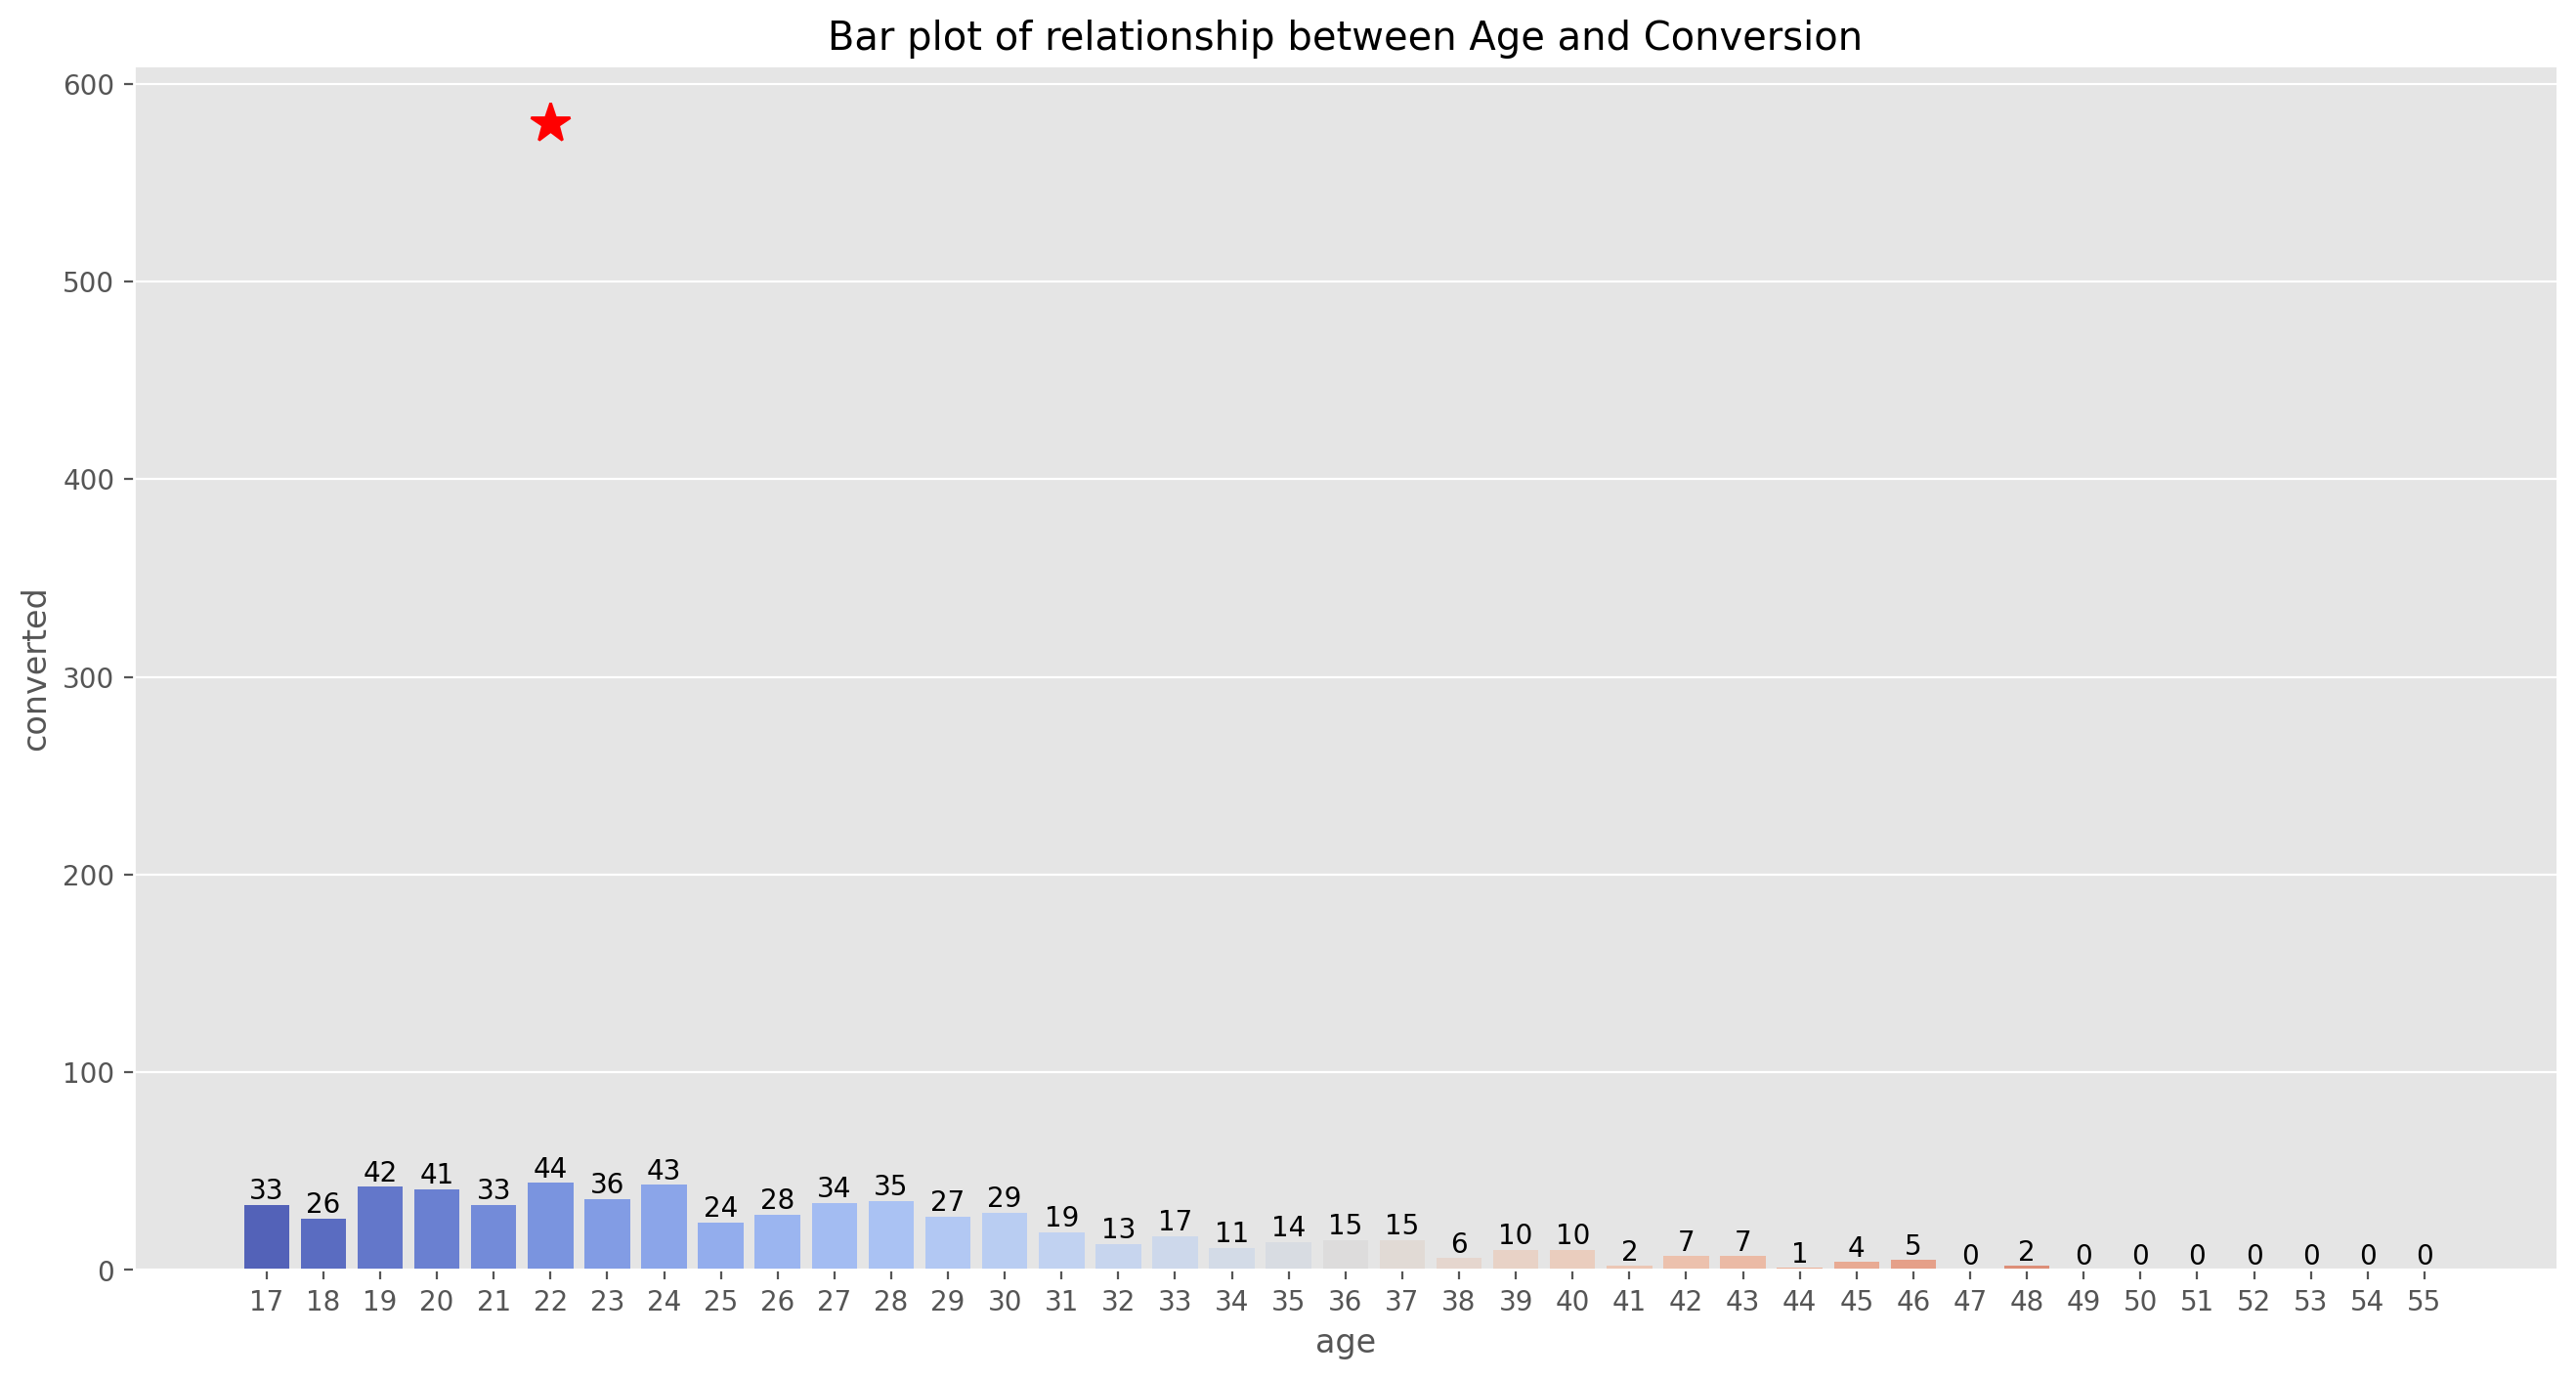

In [14]:
from matplotlib.pyplot import figure


figure(figsize=(16, 8), dpi=200)

plt.style.use('ggplot')

ax = sns.barplot(data=conversion,
                 x="age",
                 y="converted",
                 palette= "coolwarm",
                 estimator="sum",
                 errorbar=None)


ax.plot(5, 580, "*", markersize=15, color="r")

ax.set_title('Bar plot of relationship between Age and Conversion')

ax.bar_label(ax.containers[0], fontsize=10);

##### 💡 **Interpretation :**

+ From all users, we can see that the distribution of age is left skewed 
+ ▶ Fom converted people, we can clearly see that most of them have between **17 and 30 years old**, with a pick at **22 counting 556 persons**. 
+ ▶ Between 20 and 26 is the age where the concentration of observations is the most important 
+ ▶ We could already say to the Crew from the company Data Science Weekly that they have a **young public converted to their newslestter** 
+ ▶ This information extracted from graph **could help them increase their conversion rate with marketing technics to target this young population**


## **Interpretation :**

- All contries has the very similar variation in age, only outliers are a bit different

- **All countries included, converted people (25yo mean) are younger than on converted ones (30yo mean)**

---

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +

#### 🔸 **Which country convert more to the newsletter?** 💥

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



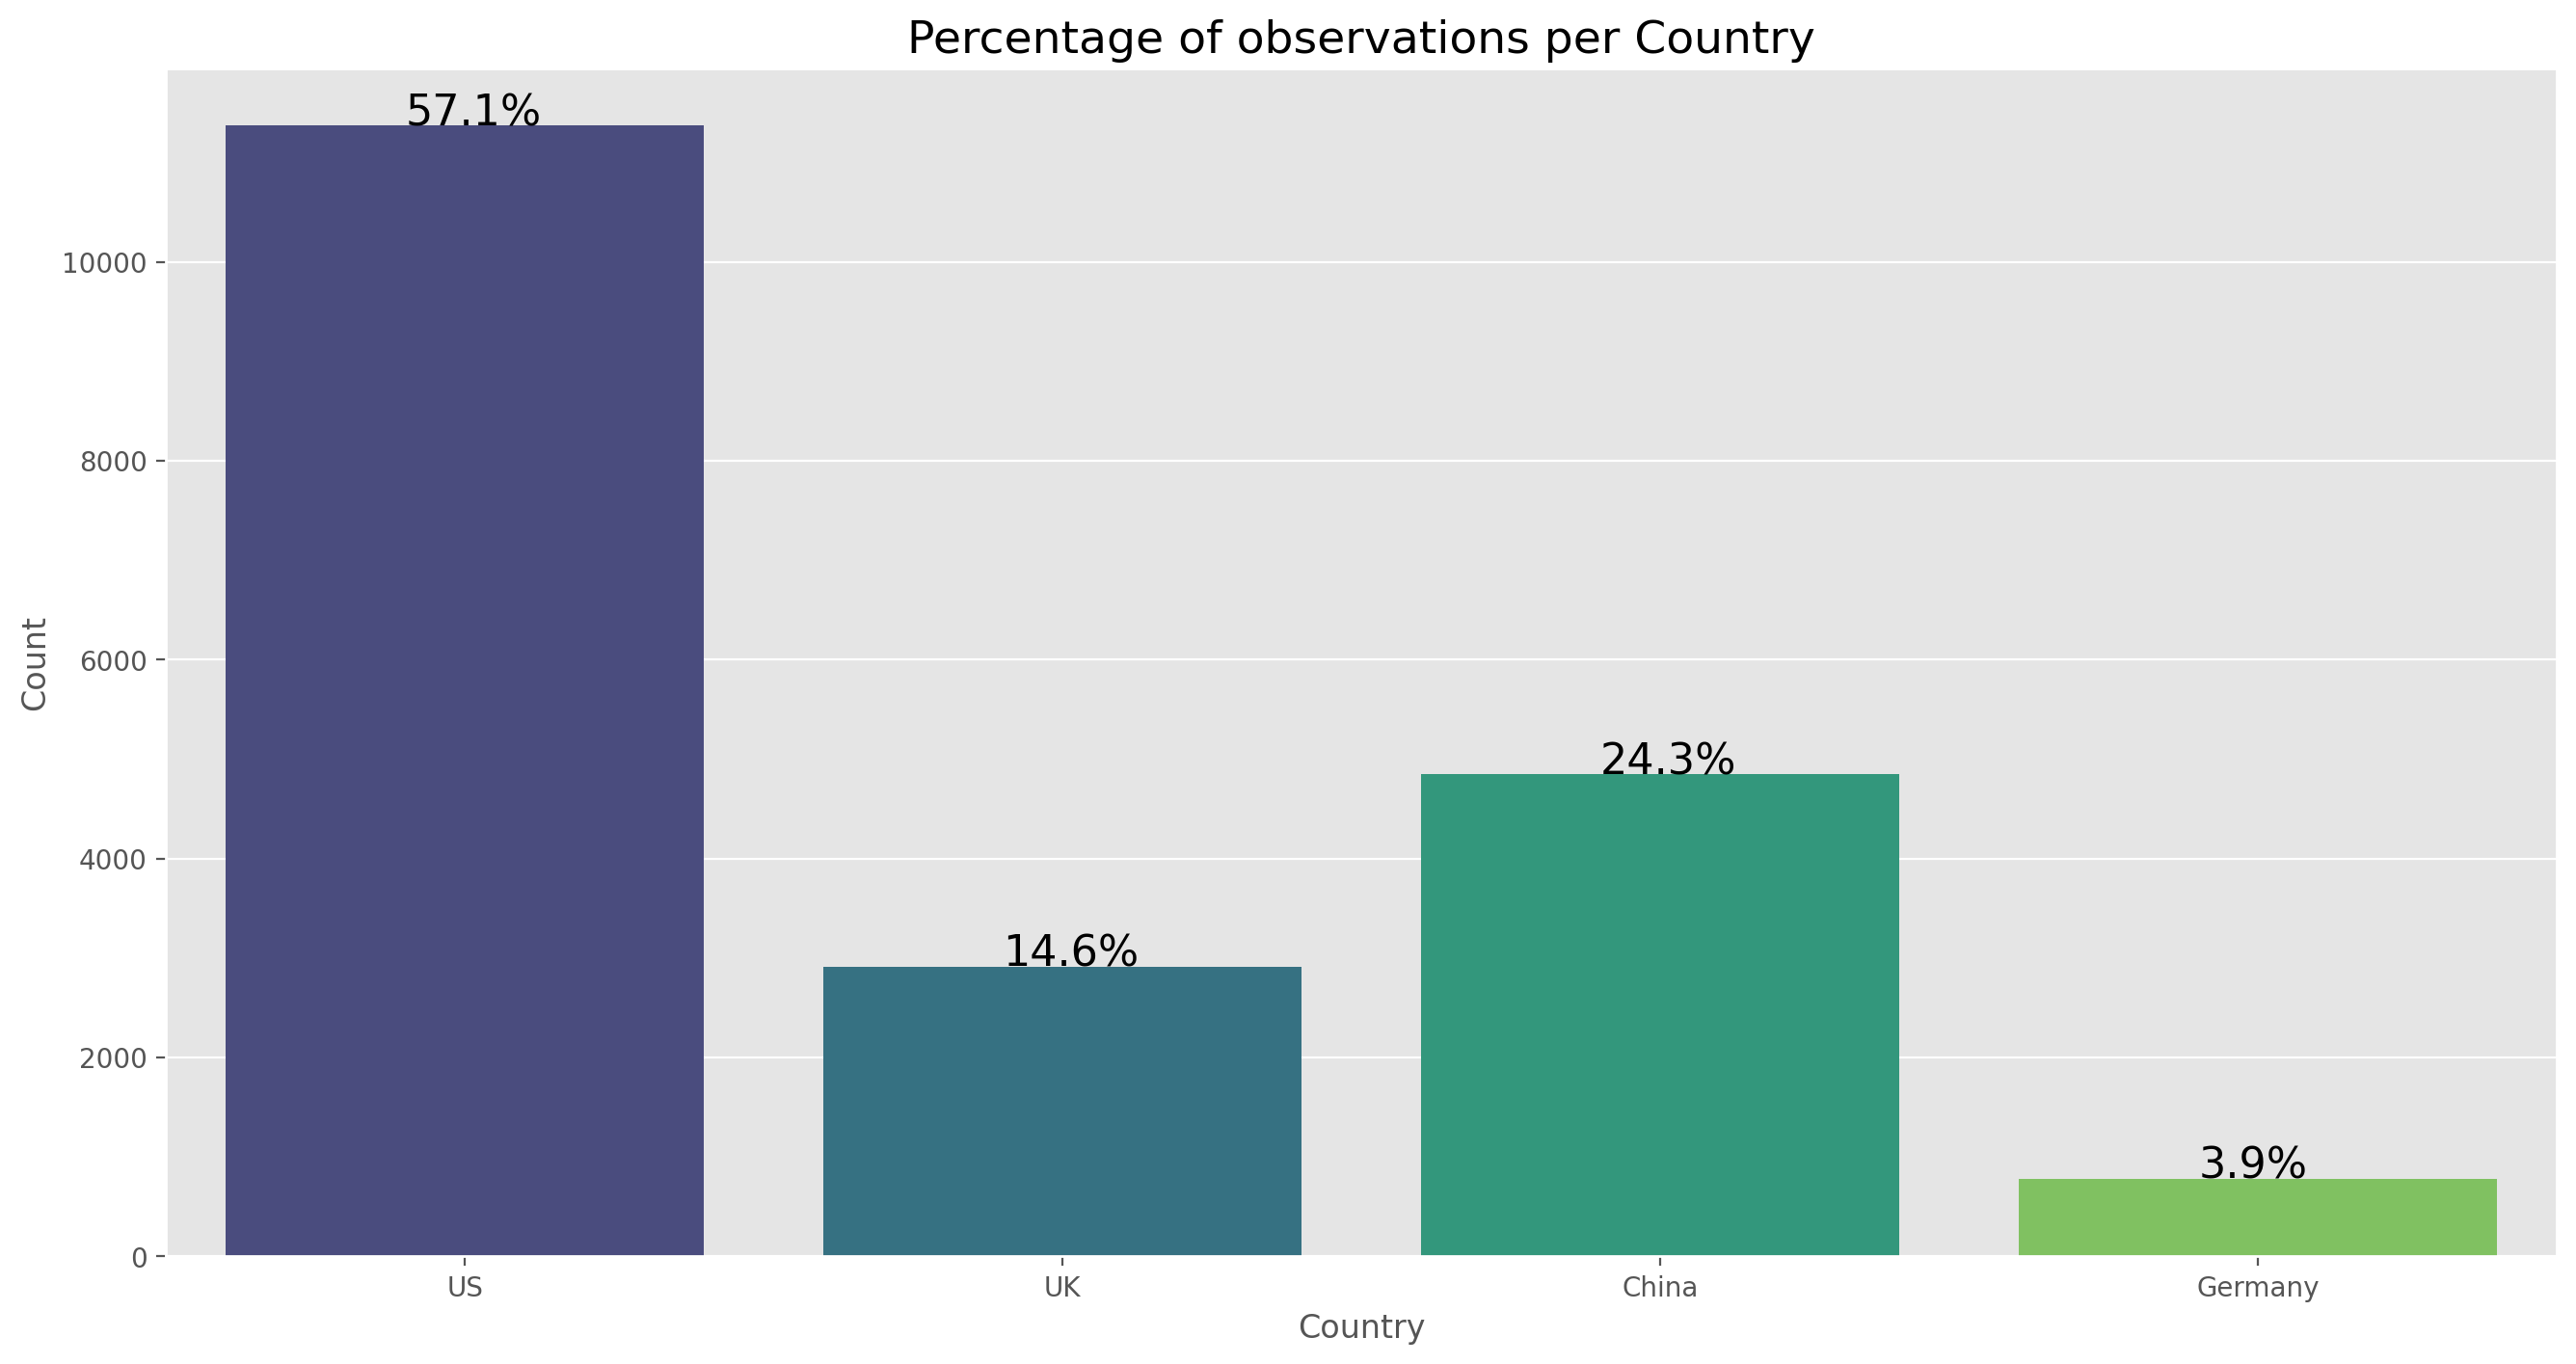

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(16, 8), dpi=200)

graph = sns.countplot(data=conversion, x='country', palette="viridis") 
graph.set_xlabel('Country', fontsize = 12)
graph.set_ylabel('Count')
graph.set_title('Percentage of observations per Country', fontsize = 17)

for i in graph.patches:
    operation = round(i.get_height()/len(conversion)*100, 1)
    text = str(operation) + '%'
    text_x = i.get_x()+0.30
    text_y = i.get_height()
    graph.text(text_x, text_y, text, size=16)

plt.show()

##### 💡 **Interpretation :**

+ More than a half observations are from US, than China, followed by UK and at the bottom list Germany 
+ It means thant **most of the persons navigating on their page are Americans**
+ *But do americans have a **conversion rate superior or inferior** to other countries?*
+ *How are **converted ones reparted inside those country?** That's what we see in the next graph :

In [16]:
fig1 = px.histogram(conversion, 
                   x="country", 
                   color='converted',
                   color_discrete_map = {0:'blue',1:'red'})
fig1.show()

print()
print('----------------------------------------------------------------')
print()
print('Switch from converted to non conterted to see the differences :')
fig2 = px.histogram(conversion, 
                   x="country", 
                   color='converted',
                   animation_frame='converted',
                   color_discrete_map = {0:'blue',1:'red'})
fig2.show()


----------------------------------------------------------------

Switch from converted to non conterted to see the differences :


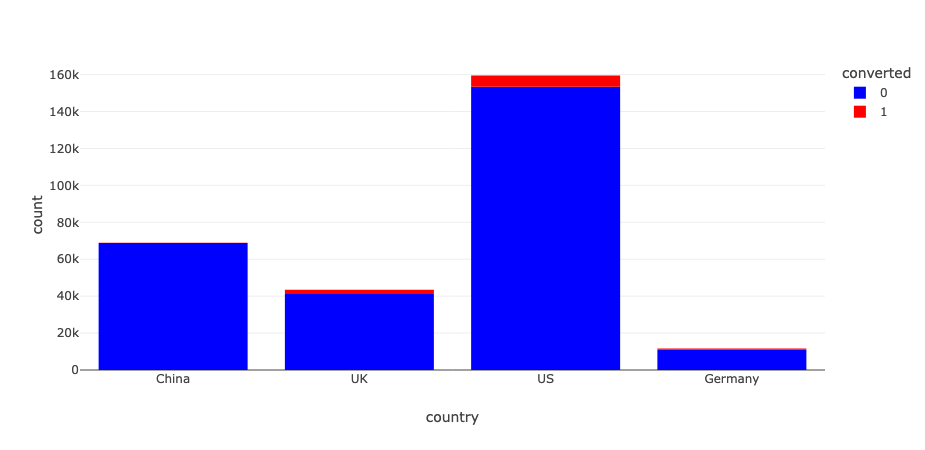

In [17]:
from IPython.display import Image
Image(filename="Graphs_EDA/graph_5.png")

##### 💡 **Interpretation :**

+ Okay, this graph is pretty cool because we can visually make the distinction between countries in function of conversions inside of it but at first sight it seems that american convert more 
+ Better calculate the Conversion rate of each country to not be fooled by our eyes 

************************************************************************
--------- C O N V E R S I O N   R A T E   P E R   C O U N T R Y --------
************************************************************************


------------------------------------------------------------------------
           +++++++++++++++++    Percentages   +++++++++++++++++         
------------------------------------------------------------------------

CHINA conversion rate percentage : 0.1 %
UNITED KINGDOM conversion rate percentage : 5.04 %
UNITED STATES conversion rate percentage : 3.82 %
GERMANY conversion rate percentage : 5.99 %

------------------------------------------------------------------------
           +++++++++++++++++   Graphic    +++++++++++++++++             
------------------------------------------------------------------------



/var/folders/qv/htbcx5kd457215x3wg_q3d6m0000gn/T/ipykernel_93569/738817985.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/qv/htbcx5kd457215x3wg_q3d6m0000gn/T/ipykernel_93569/738817985.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/qv/htbcx5kd457215x3wg_q3d6m0000gn/T/ipykernel_93569/738817985.py:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/qv/htbcx5kd457215x3wg_q3d6m0000gn/T/ipyk

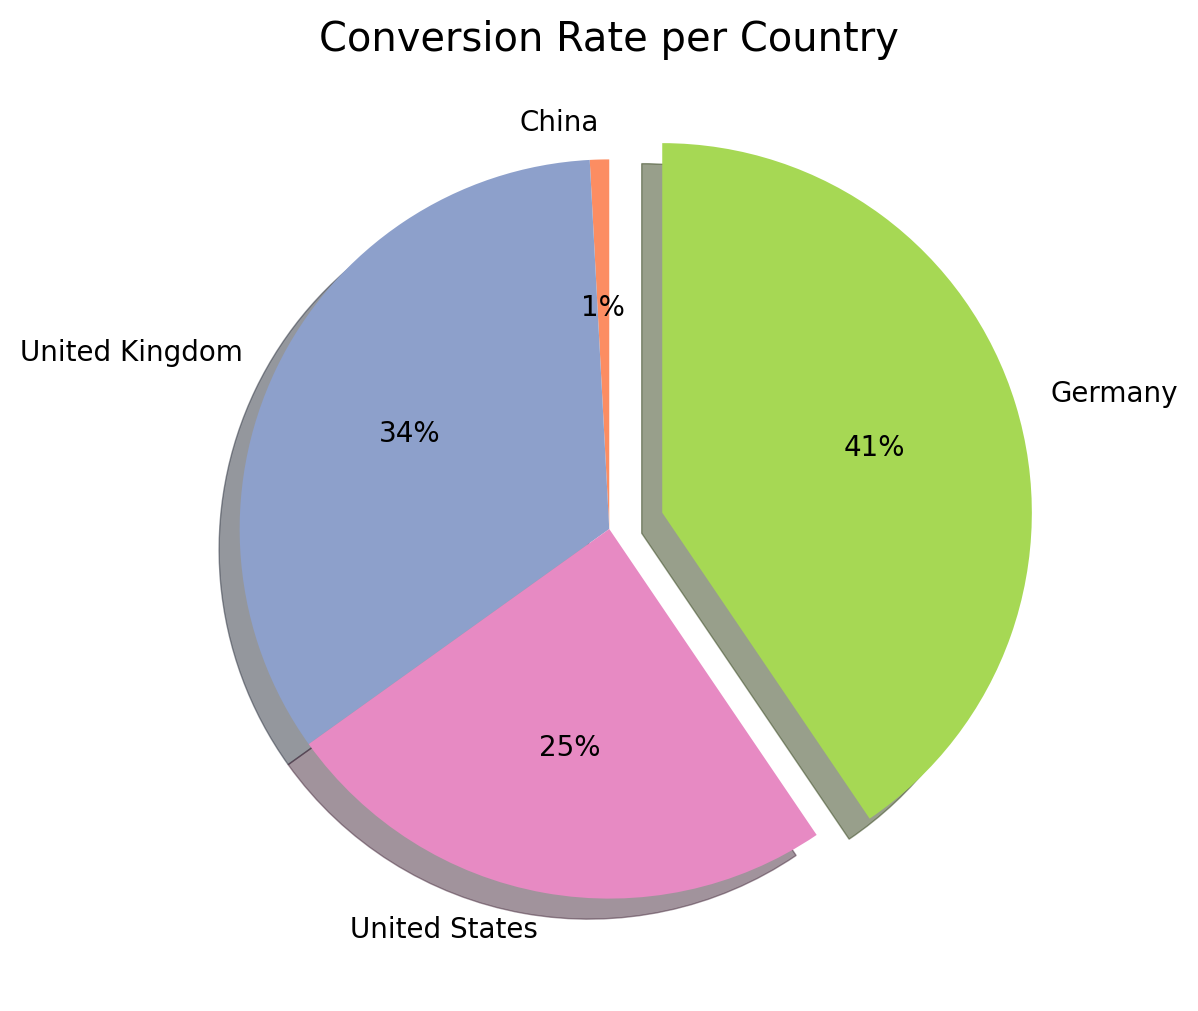


************************************************************************
************************************************************************


In [18]:
# Conversion Rate percentage per Country
# --------------------------------------------------------------------------
China_converted = conversion[(conversion['country'] == 'China') & (conversion['converted'] == 1)]
China_yes_converted = China_converted['converted'].sum() 
China_total_converted = conversion['country'].value_counts()[1]
CHINA_CONVERTED = round(China_yes_converted*100 / China_total_converted, 2)

UK_converted = conversion[(conversion['country'] == 'UK') & (conversion['converted'] == 1)]
UK_yes_converted = UK_converted['converted'].sum() 
UK_total_converted = conversion['country'].value_counts()[2]
UK_CONVERTED = round(UK_yes_converted*100 / UK_total_converted, 2)

US_converted = conversion[(conversion['country'] == 'US') & (conversion['converted'] == 1)]
US_yes_converted = US_converted['converted'].sum() 
US_total_converted = conversion['country'].value_counts()[0]
US_CONVERTED = round(US_yes_converted*100 / US_total_converted, 2)

Germany_converted = conversion[(conversion['country'] == 'Germany') & (conversion['converted'] == 1)]
Germany_yes_converted = Germany_converted['converted'].sum() 
Germany_total_converted = conversion['country'].value_counts()[3]
GERMANY_CONVERTED = round(Germany_yes_converted*100 / Germany_total_converted, 2)



#Printing percentages of conversion rate 
# --------------------------------------------------------------------------

print('************************************************************************')
print('--------- C O N V E R S I O N   R A T E   P E R   C O U N T R Y --------')
print('************************************************************************')
print()
print()
print('------------------------------------------------------------------------')
print('           +++++++++++++++++    Percentages   +++++++++++++++++         ')
print('------------------------------------------------------------------------')
print()
print(f'CHINA conversion rate percentage : {CHINA_CONVERTED} %')
print(f'UNITED KINGDOM conversion rate percentage : {UK_CONVERTED} %')
print(f'UNITED STATES conversion rate percentage : {US_CONVERTED} %')
print(f'GERMANY conversion rate percentage : {GERMANY_CONVERTED} %')
print()

print('------------------------------------------------------------------------')
print('           +++++++++++++++++   Graphic    +++++++++++++++++             ')
print('------------------------------------------------------------------------')
print()

from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=200)

data = [0.13, 5.26, 3.8, 6.26]
labels = ['China', 'United Kingdom', 'United States', 'Germany']
explode = [0, 0, 0, 0.15]

colors = sns.color_palette("Set2")[1:5]


plt.pie(data, labels = labels, 
        colors = colors, 
        autopct='%.0f%%', 
        startangle=90, 
        shadow=True,
        explode = explode)

plt.title('Conversion Rate per Country')

plt.show()

print()
print('************************************************************************')
print('************************************************************************')

##### 💡 **Interpretation :**

+ Very interesting, seems like we better trust numbers because as this pie graph shows **German people are the ones who convert more** over those 4 countries followed respectively by UK, Americans
+ **We can say to the DSW Team that they should target German population and maybe China ain't going to be their best clients**. 

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +

### 🔸 **How numerical variables are related?** 🔗

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [19]:
num_conversion = conversion.loc[:, ['age', 'total_pages_visited', 'converted']]



corr_conversion = num_conversion.corr().round(2)

import plotly.figure_factory as ff 

fig = ff.create_annotated_heatmap(corr_conversion.values,
                                  x = corr_conversion.columns.tolist(),
                                  y = corr_conversion.index.tolist(),
                                  colorscale='temps')

fig.update_layout(autosize=False,
                  height=600, 
                  width=600, 
                  margin=dict(l=130, r=100, t=100, b=100),
                  title_text="Correlation Matrix of Target and Numerical Features")

fig.show()

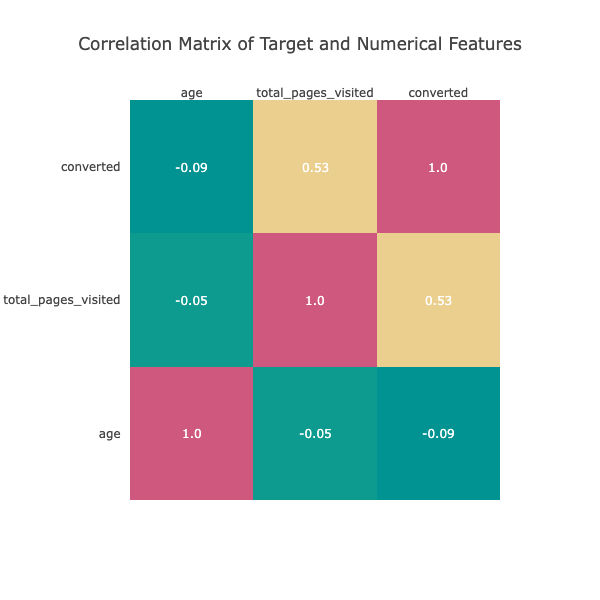

In [20]:
from IPython.display import Image
Image(filename="Graphs_EDA/graph_6.png")

##### 💡 **Interpretation :**
+ The heatmap shows cleary a **correlation between the number of pages visited and conversion** to the newsletter, let's explore that!

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + +

### 🔹 **A link between n° of pages visited and conversion?** 🔗

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [21]:
print('************************************************************************')
print('------------ T O T A L  V I S I T E D  P A G E S  (Graphics) -----------')
print('************************************************************************')
print()
print()

num_feat2 = ['total_pages_visited']  

for graphs in num_feat2:
    
    fig = px.histogram(conversion, 
                       graphs, 
                       color = 'converted', 
                       facet_row = 'converted', 
                       histnorm = 'probability',
                       color_discrete_map = {0:'green',1:'purple'})
    
    fig.update_layout(height=600, width=800)
    fig.show()

print()
print('----------------------------------------------------------------------')
print('       ++++++++++++++ M E A N   P E R   G R O U P ++++++++++++')
print('----------------------------------------------------------------------')
print()

gby_conv_pages = conversion.groupby(['converted'])['total_pages_visited'].mean()
print()

print(f'CONVERTED : Average of pages visited : {round(gby_conv_pages[1], 2)}')
print()
print(f'NON CONVERTED : Average of pages visited : {round(gby_conv_pages[0], 2)} ')
print()
rounded_ratio = round(gby_conv_pages[1]/gby_conv_pages[0], 1)
print(f'RATIO : {rounded_ratio} ')

print()
print()
print('************************************************************************')
print('************************************************************************')

************************************************************************
------------ T O T A L  V I S I T E D  P A G E S  (Graphics) -----------
************************************************************************





----------------------------------------------------------------------
       ++++++++++++++ M E A N   P E R   G R O U P ++++++++++++
----------------------------------------------------------------------


CONVERTED : Average of pages visited : 14.61

NON CONVERTED : Average of pages visited : 4.55 

RATIO : 3.2 


************************************************************************
************************************************************************


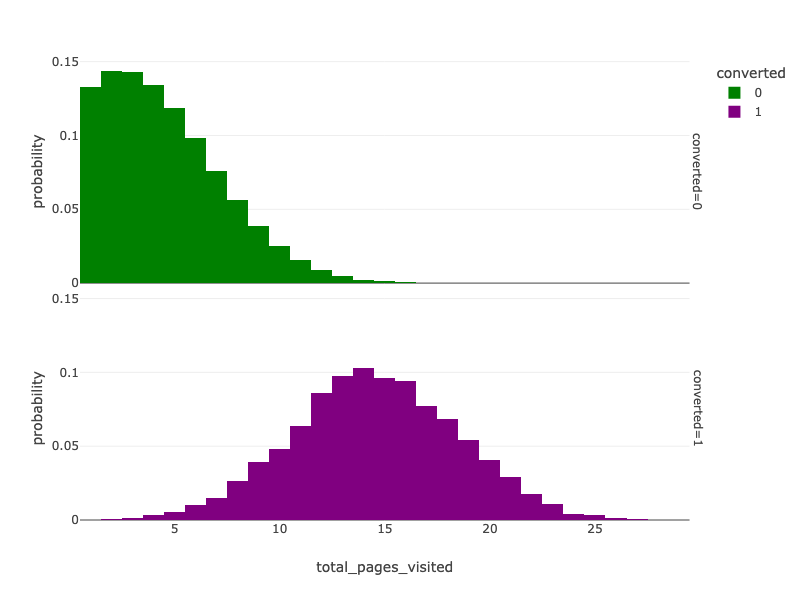

In [22]:
from IPython.display import Image
Image(filename="Graphs_EDA/graph_7.png")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



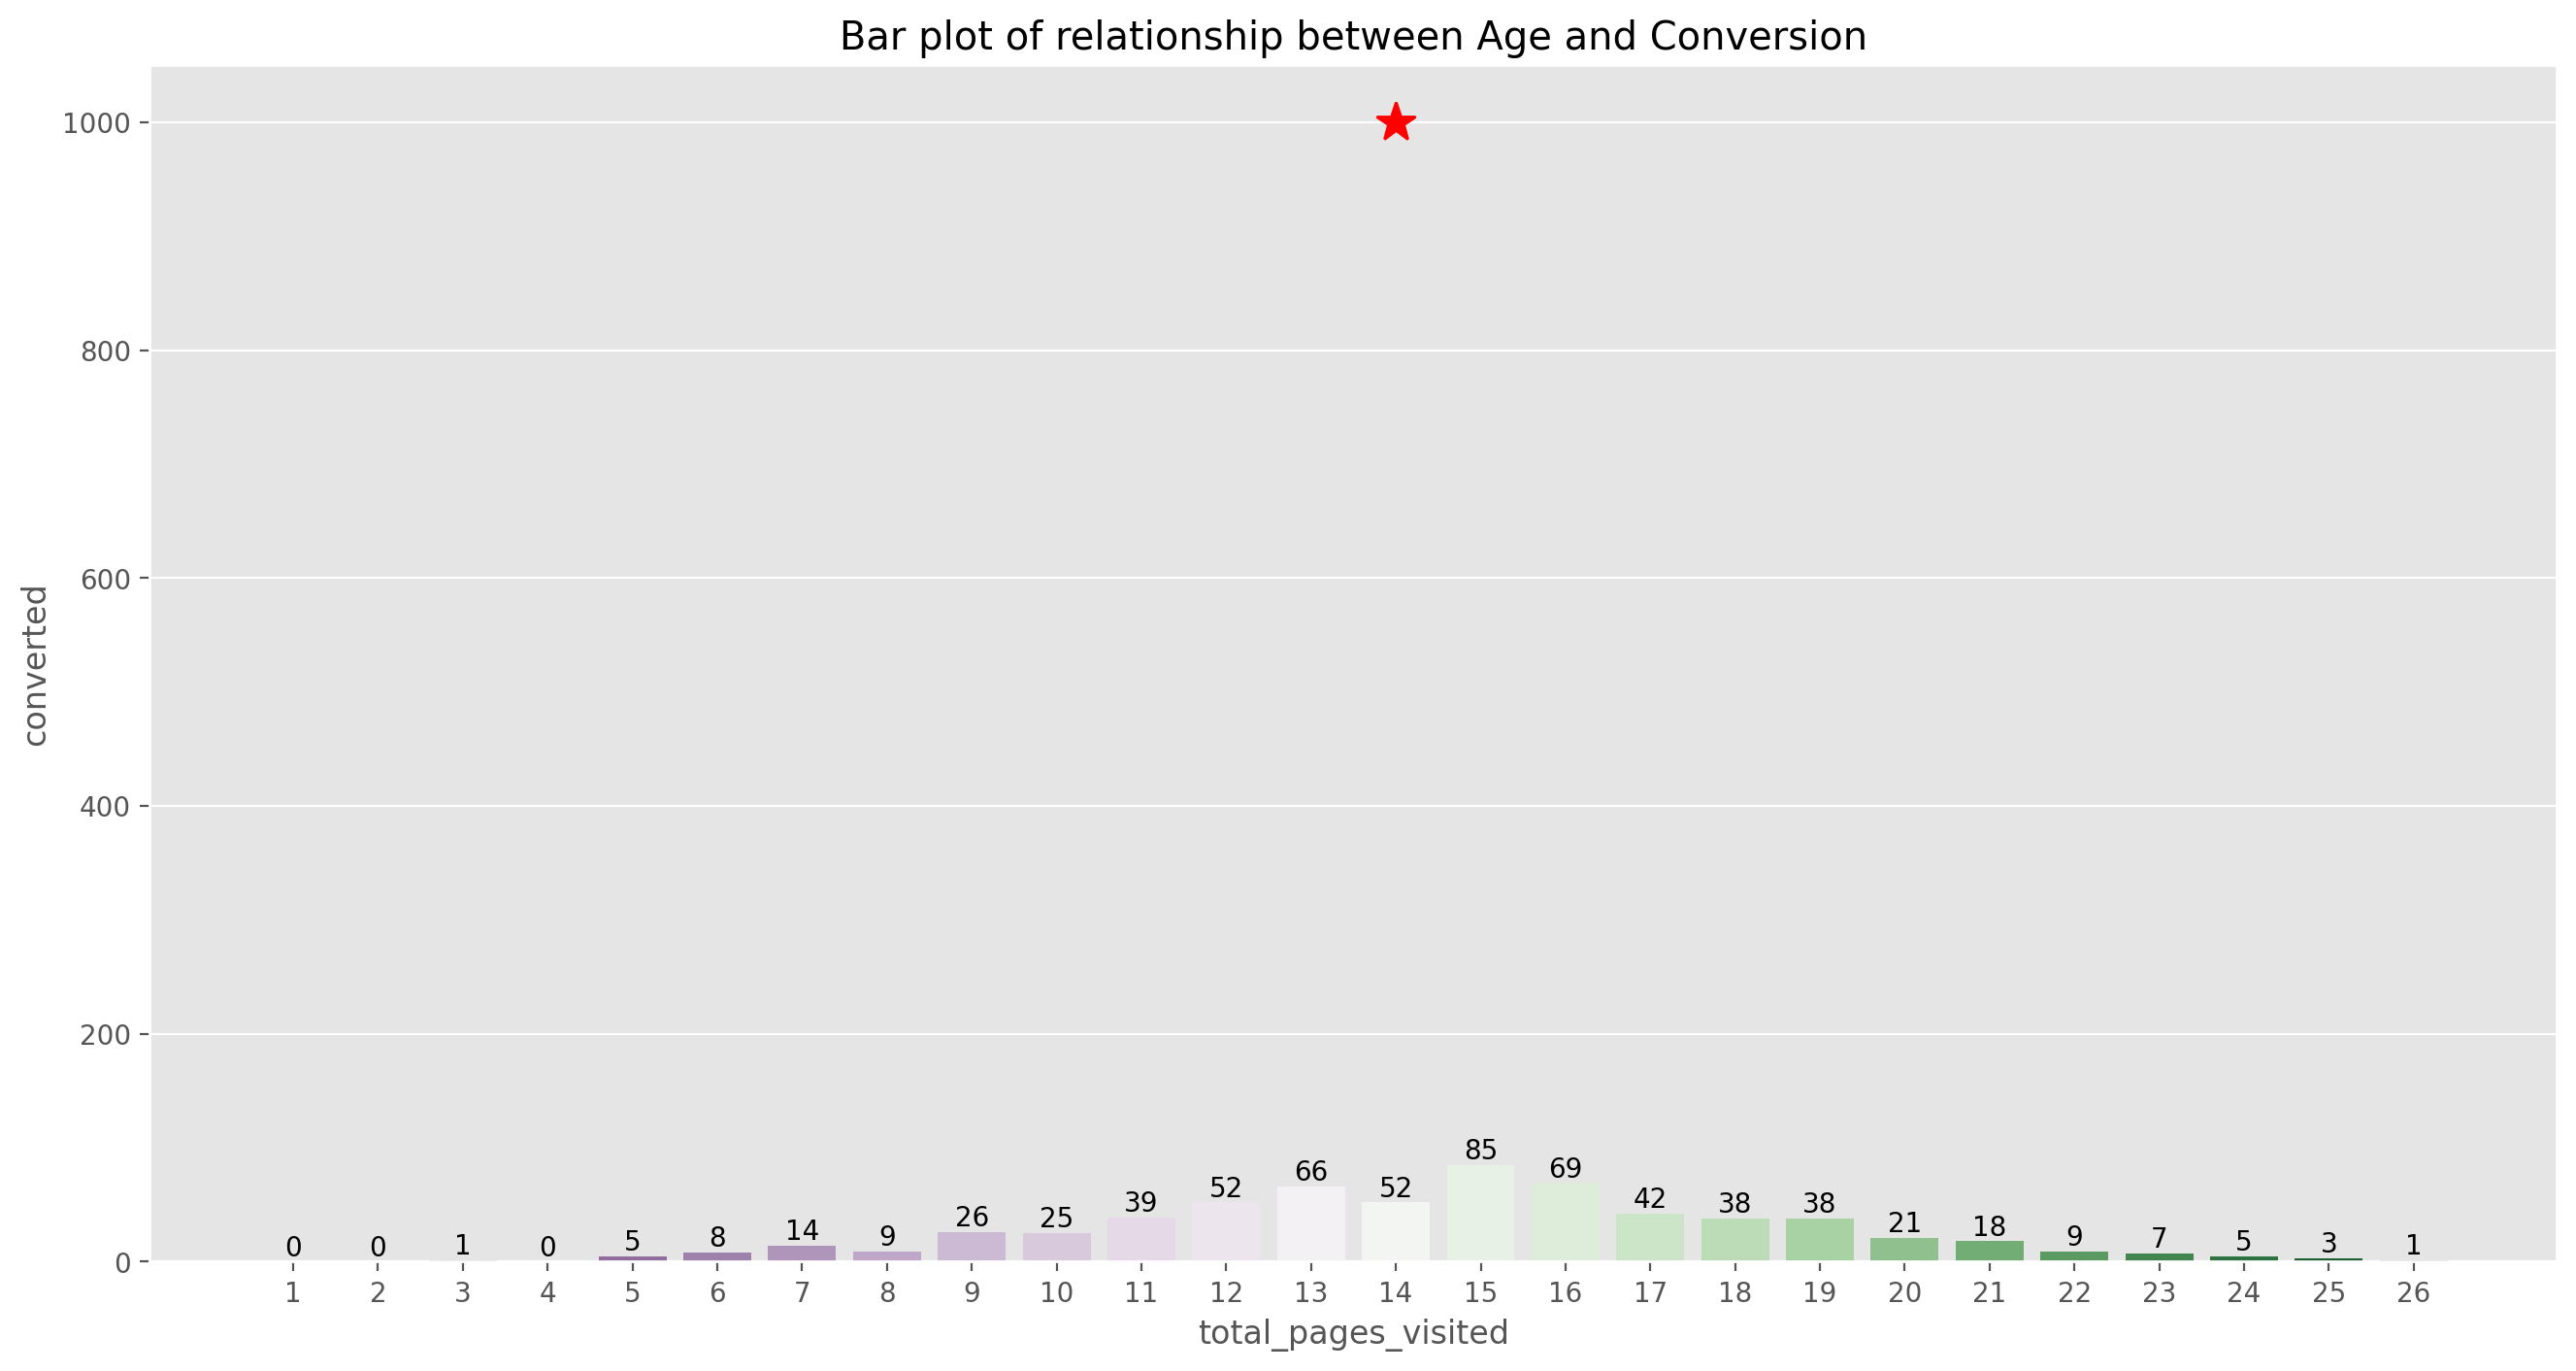

In [23]:
from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=200)

plt.style.use('ggplot')

ax = sns.barplot(data=conversion,
                 x="total_pages_visited",
                 y="converted",
                 palette= "PRGn",
                 estimator="sum",
                 errorbar=None)


ax.plot(13, 1000, "*", markersize=15, color="r")

ax.set_title('Bar plot of relationship between Age and Conversion')

ax.bar_label(ax.containers[0], fontsize=10);

##### 💡 **Interpretation :**
+ Graphs up there show distribution of non converted and converted people to the newsletter in relation with the number of pages visited (with a closer look at converted ones in the second visualization)

-  We can cleary see that non converted distribution is left skewed meaning the mean is lower :  

                - People non converted tend to look few number of pages 
                - Non converted visit an average of 4,55 pages

- On the contrary, the distribution of converted people seems to be Normal and centered : 

                - Converted people look 3 times more pages than non_converted
                - Converted visit an average of 14.56 pages
                - 946 observations (people), visited 14 pages 




+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + +

### 🔸 **Relation between n° of pages visited, conversion and country of origin** 🔗

In [24]:
fig = px.strip(conversion, x='country', y='total_pages_visited', color='converted')
fig.show('vscode')

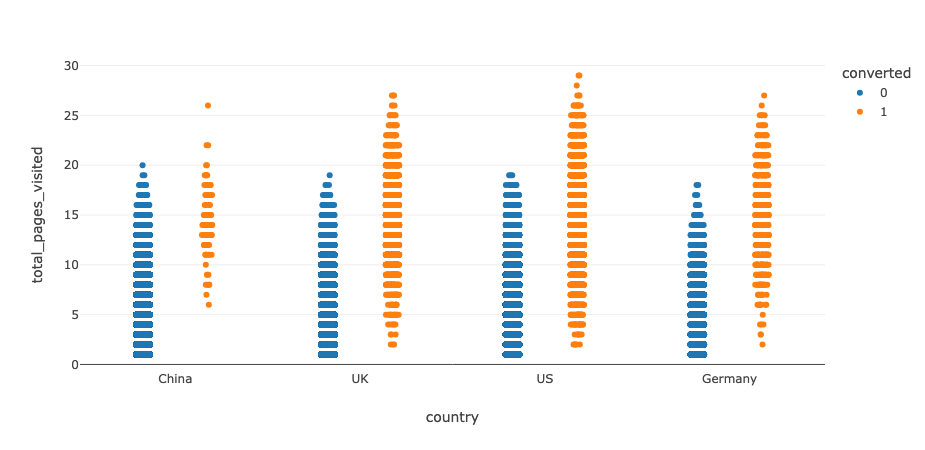

In [25]:
from IPython.display import Image
Image(filename="Graphs_EDA/graph_8.png")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Fra

Text(0.5, 0.98, 'Relation between Age, Total visited pages and Conversion')

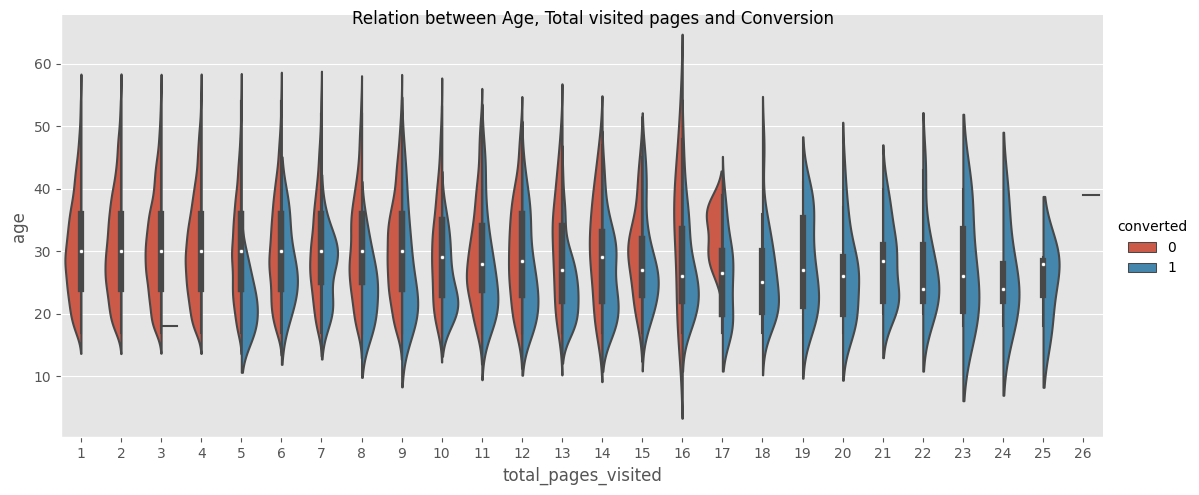

In [26]:
graph2 = sns.catplot(
    data=conversion, x="total_pages_visited", y="age", hue="converted",
    kind="violin", split=True, aspect=45/20
)

graph2.fig.suptitle('Relation between Age, Total visited pages and Conversion')

## 🔹 **Analysing Sources**

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

In [27]:
unique_user = conversion['new_user'].unique()
unique_source = conversion['source'].unique()

print(unique_user)
print(unique_source)

[0 1]
['Seo' 'Ads' 'Direct']


In [28]:
conversion['source'].value_counts()

source
Seo       9788
Ads       5633
Direct    4498
Name: count, dtype: int64

In [29]:
Seo_converted = conversion[(conversion['source'] == 'Seo') & (conversion['converted'] == 1)]
Seo_yes_converted = Seo_converted['converted'].sum() 
Seo_total_converted = conversion['source'].value_counts()[0]
SEO_CONVERTED = round(Seo_yes_converted*100 / Seo_total_converted, 2)

Ads_converted = conversion[(conversion['source'] == 'Ads') & (conversion['converted'] == 1)]
Ads_yes_converted = Ads_converted['converted'].sum() 
Ads_total_converted = conversion['source'].value_counts()[1]
ADS_CONVERTED = round(Ads_yes_converted*100 / Ads_total_converted, 2)

Direct_converted = conversion[(conversion['source'] == 'Direct') & (conversion['converted'] == 1)]
Direct_yes_converted = Direct_converted['converted'].sum() 
Direct_total_converted = conversion['source'].value_counts()[2]
DIRECT_CONVERTED = round(Direct_yes_converted*100 / Direct_total_converted, 2)



/var/folders/qv/htbcx5kd457215x3wg_q3d6m0000gn/T/ipykernel_93569/3004310744.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/qv/htbcx5kd457215x3wg_q3d6m0000gn/T/ipykernel_93569/3004310744.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/qv/htbcx5kd457215x3wg_q3d6m0000gn/T/ipykernel_93569/3004310744.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



************************************************************************
------------------- S O U R C E   T Y P E  (Percentages) ---------------
************************************************************************


SEO Source conversion rate percentage is : 3.0 %

ADS Source conversion rate percentage is : 3.6 %

DIRECT Source conversion rate percentage is : 3.02 %


----------------------------------------------------------------------
            ++++++++++++++ G R A P H I C S ++++++++++++
----------------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



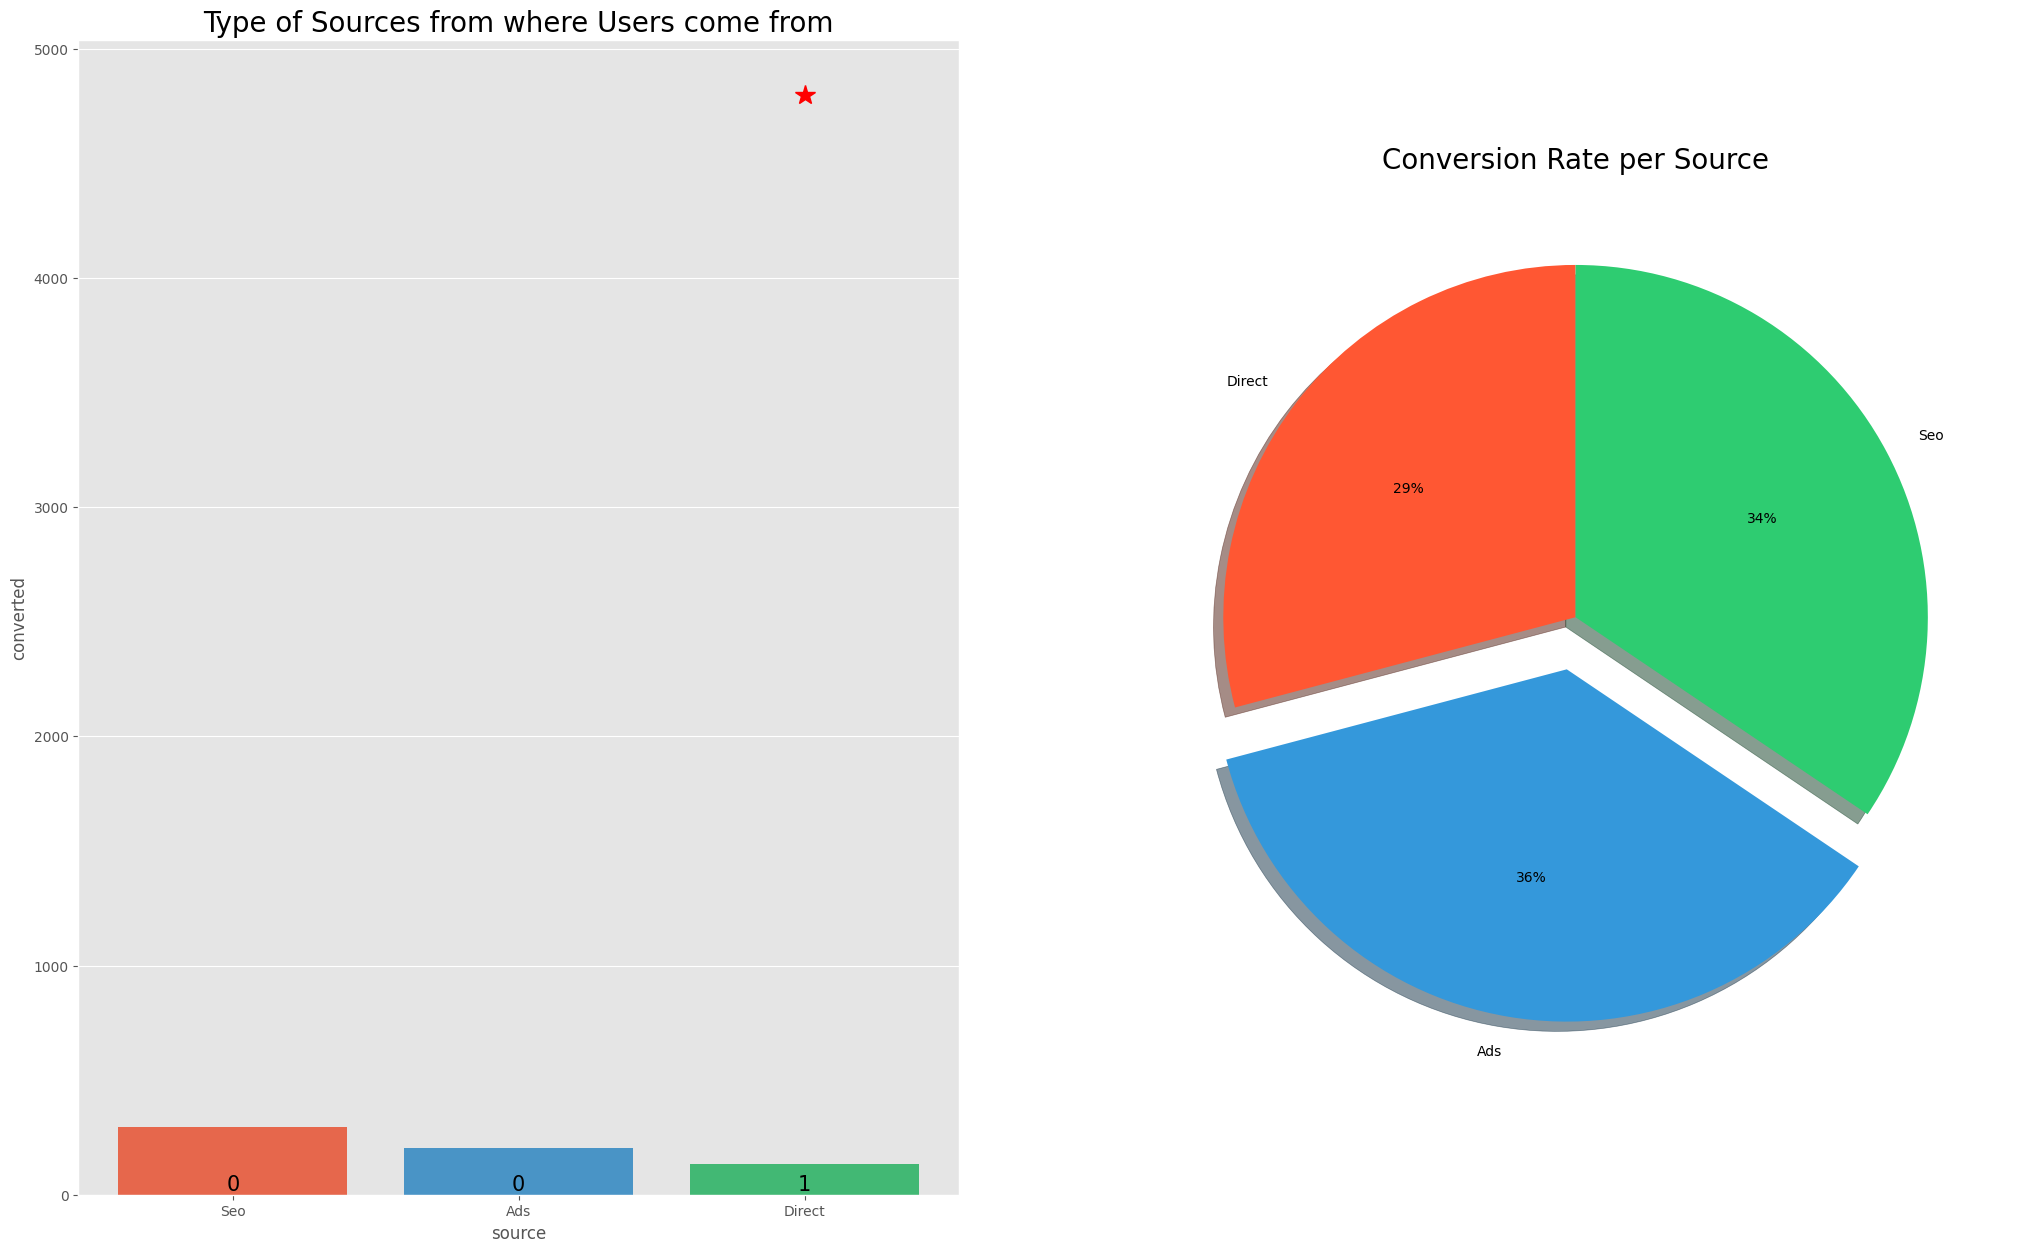

In [30]:
print('************************************************************************')
print('------------------- S O U R C E   T Y P E  (Percentages) ---------------')
print('************************************************************************')
print()
print()

print(f'SEO Source conversion rate percentage is : {SEO_CONVERTED} %')
print()
print(f'ADS Source conversion rate percentage is : {ADS_CONVERTED} %')
print()
print(f'DIRECT Source conversion rate percentage is : {DIRECT_CONVERTED} %')
print()

print()
print('----------------------------------------------------------------------')
print('            ++++++++++++++ G R A P H I C S ++++++++++++')
print('----------------------------------------------------------------------')

# PLOTLY : Source type in reation with conversion
# ----------------------------------------------------------------------------------------------------------
fig3 = px.histogram(conversion, 
                   x="source", 
                   color='converted',
                   color_discrete_map = {0:'blue',1:'red'})

fig3.update_layout(title='Stacked Bar Plot : Source type and Conversion', 
                   autosize=True)
fig3.show()



fig, axes = plt.subplots(nrows=1 , ncols=2 , figsize=(25,15))
plt.style.use('ggplot')

custom_palette = ['#FF5733', '#3498db', '#2ecc71']

# BAR PLOT of Source type
# ----------------------------------------------------------------------------------------------------------

sns.barplot(data=conversion,
                 x="source",
                 y="converted",
                 palette= custom_palette,
                 estimator="sum",
                 errorbar=None,
                 ax = axes[0])


axes[0].plot(2, 4800, "*", markersize=15, color="r")

axes[0].set_title('Type of Sources from where Users come from', fontsize = 20)

axes[0].bar_label(ax.containers[0], fontsize=15);


# PIE PLOT with percentages
# -----------------------------------------------------------------------------------------------------------------------------


data = [2.79, 3.49, 3.3]
labels = ['Direct', 'Ads', 'Seo']
explode = [0, 0.15, 0]


axes[1].pie(data, labels = labels, 
        colors = custom_palette, 
        autopct='%.0f%%', 
        startangle=90, 
        shadow=True,
        explode = explode)

plt.title('Conversion Rate per Source', fontsize = 20)

plt.show()

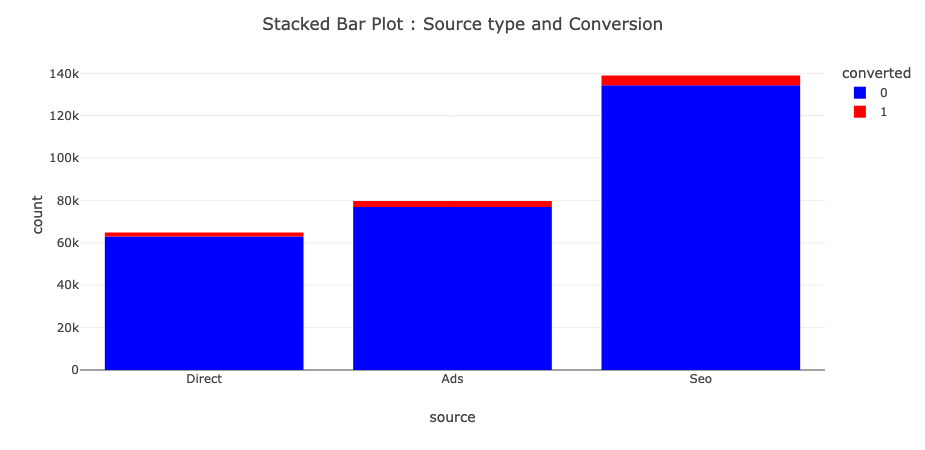

In [31]:
from IPython.display import Image
Image(filename="Graphs_EDA/graph_9.png")

In [32]:
fig3 = px.histogram(conversion, 
                   x="source", 
                   color='new_user')

fig3.update_layout(title='Source and New Users', 
                   autosize=True)
fig3.show()

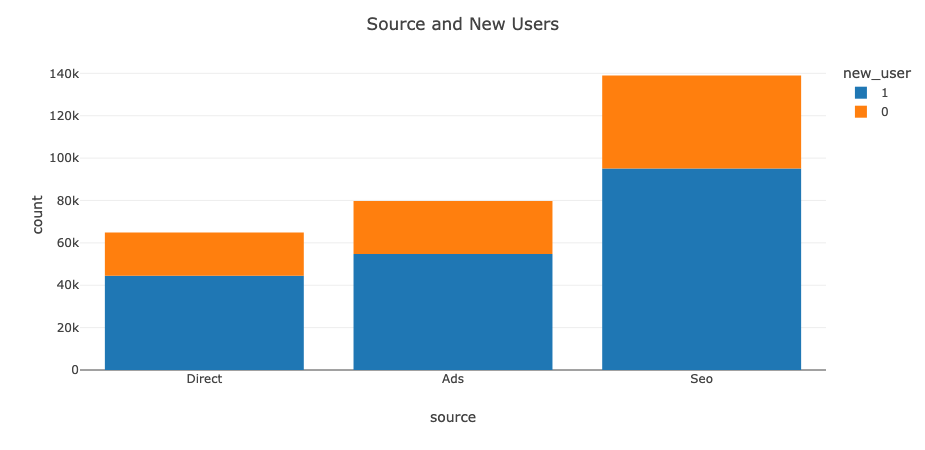

In [33]:
from IPython.display import Image
Image(filename="Graphs_EDA/graph_10.png")

##### 💡 **Interpretation :** 

+ First of all, there are **3 modalities** from which user come from : **Direct** (DSW website), **Ads**(from publicity) or from **SEO** which is a method where you can but your website first on websites
+ Thanks to those graphs we can see that **majory of Sources type come from SEO** ,followed by Ads and then Direct 
+ We can also see that **Ads are the source where the conversion rate is higher** 
+ We can sum up by saying that : 

         - SEO source is what brings the majority of observations and also new_users
         - Ads have a better conversion rate



### 🔹 **Pairplot with numerical variables** 

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Fra

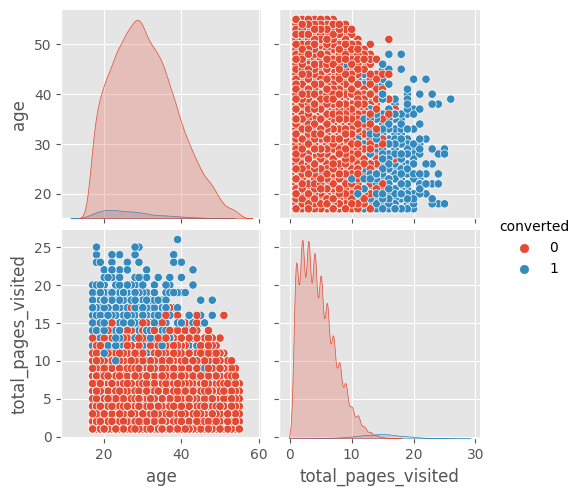

In [34]:
sns.pairplot(num_conversion, hue='converted')

-----

-----
